<a href="https://colab.research.google.com/github/Ladangigo/WORDLE_Entendimiento_datos/blob/main/Estadisticos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
from scipy import stats
import random
import os

Se realizan muestreos de cada fuente de información

In [ ]:
with open('/content/Data/final_resume_file.txt', 'r',encoding="utf8") as raw_file:
    archivo = raw_file.read()

In [ ]:
final_resume_file = archivo.split(' ')

In [ ]:
Muestra = int(len(final_resume_file)/10)
MuestreoDatosLimpios = random.sample(final_resume_file, Muestra)
print(MuestreoDatosLimpios)
print(Muestra)

Se realiza recopilación de datos con su respectiva gráfica 

In [ ]:
Total_palabras = len(final_resume_file)
print (f"Se cuenta con un total de {Total_palabras} palabras")

Se cuenta con un total de 32554 palabras


In [ ]:
#Longitud de las palabras
longitud_palabras = []
for palabra in final_resume_file:
  longitud = len(palabra)
  longitud_palabras.append(longitud)

dicLongitud = {'Longitud':longitud_palabras}
DFLongitud = pd.DataFrame(dicLongitud)
print (f"El banco de palabras cuenta con una longitud de palabras : {longitud_palabras[:10]}")


El banco de palabras cuenta con una longitud de palabras : [10, 9, 8, 5, 10, 5, 8, 9, 8, 10]


In [ ]:
# medidas de tendencia central para la longitud de todas las palabras
media = np.mean(longitud_palabras)
mediana = np.median(longitud_palabras)
moda = stats.mode(longitud_palabras)

print(f"la media es {media}, la mediana es {mediana}, la moda es {moda}")

la media es 8.509369048350433, la mediana es 8.0, la moda es ModeResult(mode=array([8]), count=array([4901]))


In [113]:
#Medidas de dispersión estadística
desviacionEstandar = np.std(longitud_palabras)
varianza = np.var(longitud_palabras)
rango = max(longitud_palabras) - min (longitud_palabras)
print(f"El rango es {rango}, la varianza es de {varianza} y la desviación estandar de {desviacionEstandar}")

El rango es 21, la varianza es de 6.768926781355689 y la desviación estandar de 2.6017161223614864


In [115]:
#Medidas de posicionamiento estadístico:
c1 = np.percentile(longitud_palabras,25)
c2 = np.percentile(longitud_palabras,50)    
c3 = np.percentile(longitud_palabras,75)
per90 = np.percentile(longitud_palabras,90)

dicMP = {'Q1': c1,'Q2': c2, 'Q3':c3, 'P90': per90}
print(dicMP)

RIC = c3 -c1
datos_atipicos = c3 + 1.5*RIC
print(datos_atipicos)
print (f"El rango intercualil es {RIC} y se tienen datos atípicos para valores mayores a {datos_atipicos}")

{'Q1': 7.0, 'Q2': 8.0, 'Q3': 10.0, 'P90': 12.0}
14.5
El rango intercualil es 3.0 y se tienen datos atípicos para valores mayores a 14.5


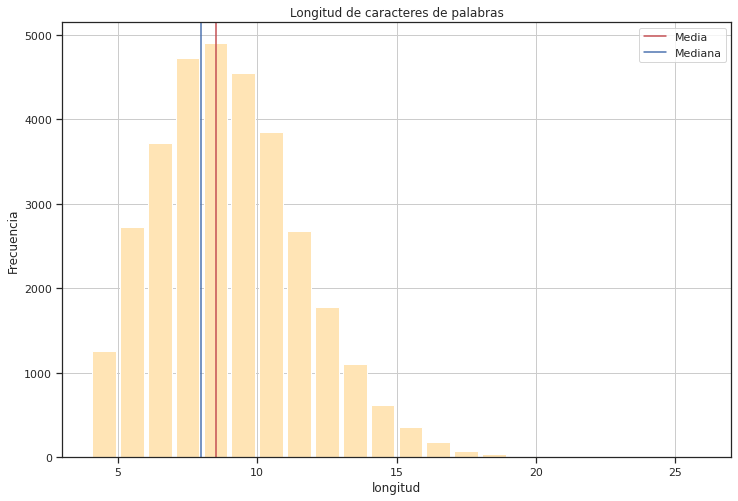

In [ ]:
plt.figure(figsize = (12,8))
plt.axvline(media, label = 'Media', color='r')
plt.axvline(mediana,label = 'Mediana', color='b')
plt.title('Longitud de caracteres de palabras')
plt.xlabel('longitud')
plt.ylabel('Frecuencia')
plt.legend()
intervalos = range(min(longitud_palabras), max(longitud_palabras) + 2) #calculamos los extremos de los intervalos
plt.hist(longitud_palabras, bins=intervalos, color='moccasin', rwidth=0.85)
plt.grid(True)
plt.show()


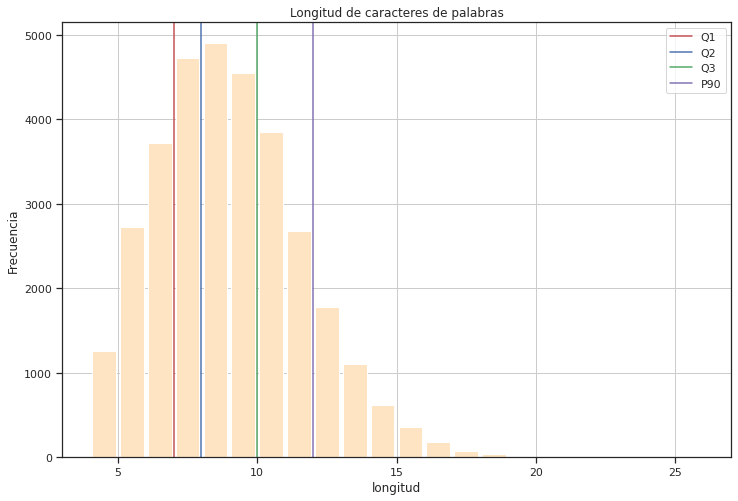

In [ ]:
plt.figure(figsize = (12,8))
plt.axvline(c1, label = 'Q1', color='r')
plt.axvline(c2,label = 'Q2', color='b')
plt.axvline(c3,label = 'Q3', color='g')
plt.axvline(per90,label = 'P90', color='m')
plt.title('Longitud de caracteres de palabras')
plt.xlabel('longitud')
plt.ylabel('Frecuencia')
plt.legend()
intervalos = range(min(longitud_palabras), max(longitud_palabras) + 2) #calculamos los extremos de los intervalos
plt.hist(longitud_palabras, bins=intervalos, color='bisque', rwidth=0.85)
plt.grid(True)
plt.show()

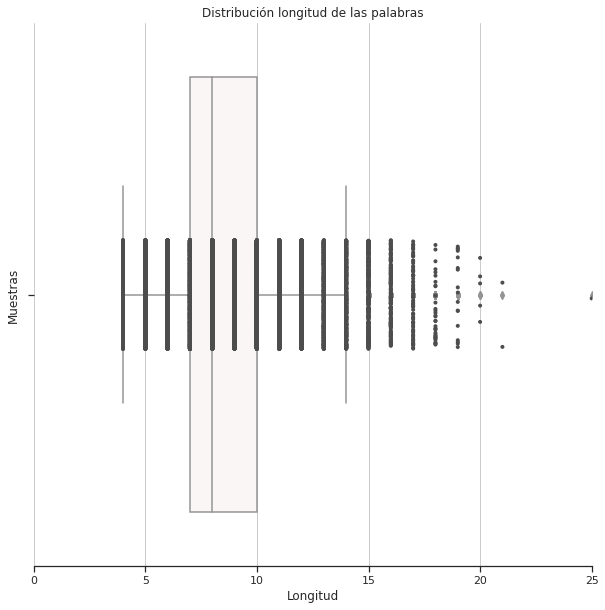

In [ ]:
#Graficar un boxplot
sns.set_theme(style="ticks")

f, ax = plt.subplots(figsize=(10, 10))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Longitud", data=DFLongitud.sort_values('Longitud'),palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Longitud", data=DFLongitud.sort_values('Longitud'),
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="Muestras")
ax.set_title('Distribución longitud de las palabras')
ax.axis(xmin=0,xmax=25)
sns.set_theme(style="whitegrid")
sns.despine(trim=True, left=True)

In [ ]:
letters = ['a','b','c','d','e','f','g','h','i','j','k','l','m','n','ñ','o','p','q','r','s','t','u','v','w','x','y','z']
dictotal={}
for i in letters:
  dictotal[i]=archivo.count(i)
DFAlfabeto = pd.DataFrame(dictotal,index=[0])
print(DFAlfabeto)

       a     b      c      d      e     f     g     h      i     j  ...    q  \
0  36000  4664  14755  11791  27598  3081  4457  2488  26145  1085  ...  619   

       r      s      t     u     v    w    x    y     z  
0  21406  19604  15028  8060  3395  374  727  836  1651  

[1 rows x 27 columns]


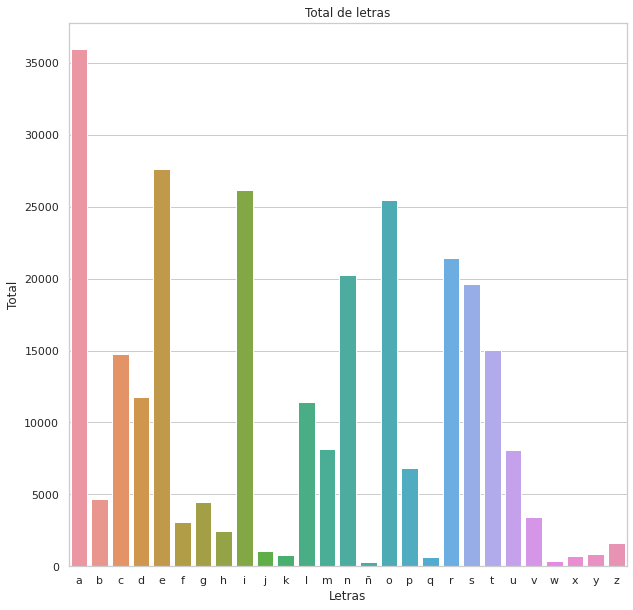

In [ ]:
f, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Total de letras')
ax.set(ylabel="Total")
ax.set(xlabel="Letras")
sns.set_theme(style="whitegrid")
ax = sns.barplot(data=DFAlfabeto)

In [ ]:
alphabet = {}
alphabet2 = {}
for letter in letters:
  alphabet[letter] = []


for word in final_resume_file:
  for position,letter in enumerate(word):
      alphabet[letter].append(position) 



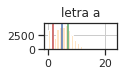

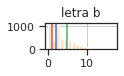

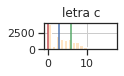

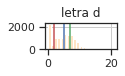

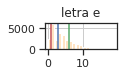

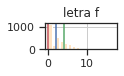

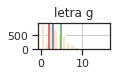

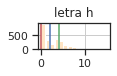

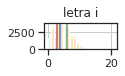

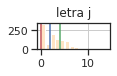

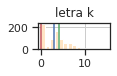

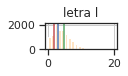

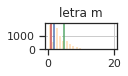

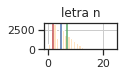

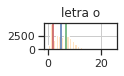

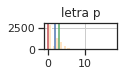

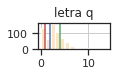

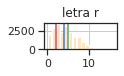

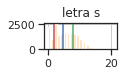

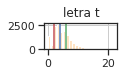

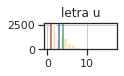

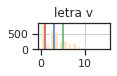

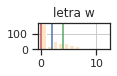

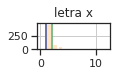

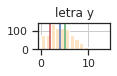

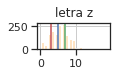

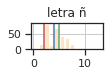

In [102]:
posicion = 1
myList = alphabet.items()
myList = sorted(myList) 
x, y = zip(*myList) 
DicMedidasTendenciaCEntral = {'Letra':[ ],'Mediana': [ ], 'Media': [ ],'Moda': [ ] }
DicDistribucionPosicion = {'Letra':[ ],'Q1': [ ], 'Q2': [ ],'Q3': [ ] }

for letra in myList:  
    cuartilA1 = np.percentile(letra[1],25)
    cuartilA2 = np.percentile(letra[1],50)    
    cuartilA3 = np.percentile(letra[1],75)
    DicDistribucionPosicion['Letra'].append(letra[0])
    DicDistribucionPosicion['Q1'].append(cuartilA1)
    DicDistribucionPosicion['Q2'].append(cuartilA2)
    DicDistribucionPosicion['Q3'].append(cuartilA3)
    
    media = np.mean(letra[1])
    mediana = np.median(letra[1])
    moda = stats.mode(letra[1])
    DicMedidasTendenciaCEntral['Letra'].append(letra[0])
    DicMedidasTendenciaCEntral['Media'].append(media)
    DicMedidasTendenciaCEntral['Mediana'].append(mediana)
    DicMedidasTendenciaCEntral['Moda'].append(moda)
    plt.subplot(7,4,posicion)
    
    plt.axvline(cuartilA1, color='r')
    plt.axvline(cuartilA2, color='b')
    plt.axvline(cuartilA3, color='g')
    plt.title(f"letra {letra[0]}")
    #plt.xlabel('longitud')
    #plt.ylabel('Frecuencia')
    #plt.legend()
    intervalosA = range(min(letra[1]), max(letra[1]) + 2) #calculamos los extremos de los intervalos
    plt.hist(letra[1], bins=intervalosA, color='bisque', rwidth=0.85)
    plt.grid(True)
    plt.show()
    posicion = posicion +1

In [ ]:
DFMedidasTendenciaCEntral= pd.DataFrame(DicMedidasTendenciaCEntral)
#DFMedidasTendenciaCEntral

DFMedidasTendenciaCEntral = pd.DataFrame(DicDistribucionPosicion)
DFMedidasTendenciaCEntral

In [ ]:
dictOFdicts = {}
dictToDF_letterPosition = {'Letra':[], 'Posicion':[]}
dictToDF_wordInfo = {'Consonante':[], 'Vocal':[], 'Longitud': []}

#Conocer el numero de vocales y consonantes de una palabra
for word in final_resume_file:
  numberVowels = len([l for l in word if l in 'aeiou'])
  numberCons = len(word) - numberVowels
  length = len(word)
  dictToDF_wordInfo['Consonante'].append(numberCons)
  dictToDF_wordInfo['Vocal'].append(numberVowels)
  dictToDF_wordInfo['Longitud'].append(length)

  for position,letter in enumerate(word):    
    dictToDF_letterPosition['Letra'].append(letter)
    dictToDF_letterPosition['Posicion'].append(position)

DF_letterPosition = pd.DataFrame(dictToDF_letterPosition)
DF_wordInfo = pd.DataFrame(dictToDF_wordInfo)

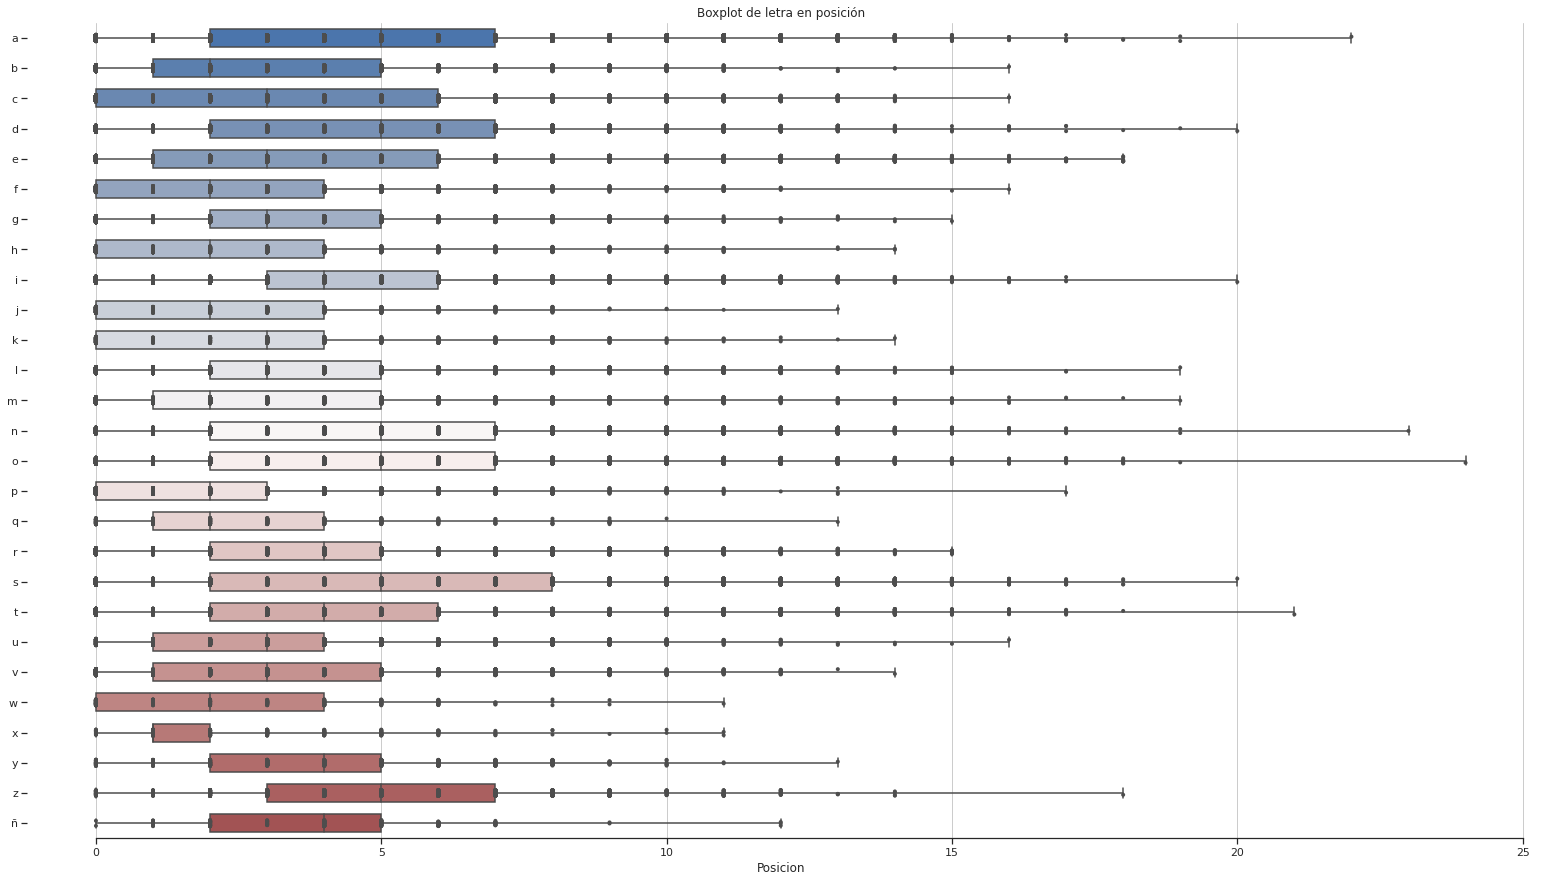

In [ ]:
#Graficar un boxplot
sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(27, 15))

# Plot the orbital period with horizontal boxes
sns.boxplot(x="Posicion", y="Letra", data=DF_letterPosition.sort_values('Letra'),
            whis=[0, 100], width=.6, palette="vlag")

# Add in points to show each observation
sns.stripplot(x="Posicion", y="Letra", data=DF_letterPosition.sort_values('Letra'),
              size=4, color=".3", linewidth=0)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
ax.set_title('Boxplot de letra en posición')
sns.despine(trim=True, left=True)

In [ ]:
#Conocer la posicion de vocales y consonantes dentro de cada palabra
DicToDF_positionvowelsCons = {'Palabra':[],'Longitud': [], 'posicionVocal':[], 'posicionCons': []}
vowels = []
cons = []

for word in final_resume_file:
  DicToDF_positionvowelsCons['Palabra'].append(word)
  lengthWord = len(word)
  DicToDF_positionvowelsCons['Longitud'].append(lengthWord)

  for position,letter in enumerate(word): 
    if letter in 'aeiou':
      vowels.append(position)
    else:
      cons.append(position)
  DicToDF_positionvowelsCons['posicionVocal'].append(vowels)
  DicToDF_positionvowelsCons['posicionCons'].append(cons)
  vowels =[]
  cons = []

DF_positionvowelsCons = pd.DataFrame(DicToDF_positionvowelsCons)


def createGroupedDF(lenghtWord):
  newDF_dict = {'Palabra':[]}
  for newKey in range(lenghtWord):
    newDF_dict[f'posicion {str(newKey)}'] = []
  
  for index, longitud in enumerate(DicToDF_positionvowelsCons['Longitud']):
    if longitud == lenghtWord:
      word = DicToDF_positionvowelsCons['Palabra'][index]
      newDF_dict['Palabra'].append(word)

      for positionVowel in DicToDF_positionvowelsCons['posicionVocal'][index]:
        newDF_dict[f'posicion {str(positionVowel)}'].append(1)#1 para vocales
      for positionCons in DicToDF_positionvowelsCons['posicionCons'][index]:
        newDF_dict[f'posicion {str(positionCons)}'].append(0)#0 para Consonante
  
  return pd.DataFrame(newDF_dict)
  print(DF_positionvowelsCons)

In [ ]:
dfGrouped4 = createGroupedDF(4)
print(dfGrouped4.head())

def resumePatterns(DFGrouped):#Cuenta y retorna un DF con la cantidad de veces que se repite un patron. Por ejemplo, en una palabra de 4 letras el patron: 1010
  return DFGrouped[DFGrouped.columns[1:]].groupby(DFGrouped[DFGrouped.columns[1:]].columns.tolist(),as_index=False).size()

def getWords4(DFGrouped):#Retorna las palabras que concidan con el patron 0000
  #listPostions = [f'posicion {position}' for position in range(len(DFGrouped.columns) - 1)]
  return DFGrouped[np.logical_and(np.logical_and(DFGrouped['posicion 0']==0, DFGrouped['posicion 1']==0), np.logical_and(DFGrouped['posicion 2']==0, DFGrouped['posicion 3']==0))]

def getWords8(DFGrouped):#Retorna las palabras que concidan con el patron 00000000
  #listPostions = [f'posicion {position}' for position in range(len(DFGrouped.columns) - 1)]
  return DFGrouped[np.logical_and(np.logical_and(np.logical_and(DFGrouped['posicion 0']==0, DFGrouped['posicion 1']==0), np.logical_and(DFGrouped['posicion 2']==0, DFGrouped['posicion 3']==0)),
                   np.logical_and(np.logical_and(DFGrouped['posicion 4']==0, DFGrouped['posicion 5']==0), np.logical_and(DFGrouped['posicion 6']==0, DFGrouped['posicion 7']==0)))]


words = getWords4(dfGrouped4)
print(words)
resumePatterns4 = resumePatterns(dfGrouped4)
print(resumePatterns4)

  Palabra  posicion 0  posicion 1  posicion 2  posicion 3
0    area           1           0           1           1
1    agua           1           0           1           1
2    base           0           1           0           1
3    tipo           0           1           0           1
4    solo           0           1           0           1
     Palabra  posicion 0  posicion 1  posicion 2  posicion 3
1063    yrny           0           0           0           0
1076    tysk           0           0           0           0
1103    ynys           0           0           0           0
1116    byrd           0           0           0           0
1236    lynn           0           0           0           0
1243    msnm           0           0           0           0
    posicion 0  posicion 1  posicion 2  posicion 3  size
0            0           0           0           0     6
1            0           0           0           1     1
2            0           0           1           0    

In [ ]:
groupedDF4 = createGroupedDF(4)


def resumeGroupedDF(groupedDF):
  dictToDF = {'Posicion':[], 'Vocales': [], 'Consonantes': []}
  for column in groupedDF.columns[1:]:
    infoPos = groupedDF4[column].value_counts()
    dictToDF['Posicion'].append(column)
    dictToDF['Vocales'].append(infoPos[1])
    dictToDF['Consonantes'].append(infoPos[0])

  return pd.DataFrame(dictToDF)

Lon4 = resumeGroupedDF(groupedDF4)

print(Lon4)

     Posicion  Vocales  Consonantes
0  posicion 0      247         1006
1  posicion 1      931          322
2  posicion 2      357          896
3  posicion 3      747          506


[Text(0.5, 0, 'Posición')]

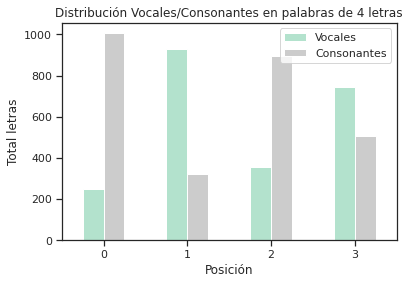

In [111]:

sns.set_theme(style="ticks")
barplot = Lon4.plot.bar(rot=0, colormap='Pastel2')
barplot.set_title('Distribución Vocales/Consonantes en palabras de 4 letras')
barplot.set(ylabel="Total letras")
barplot.set(xlabel="Posición")

     Posicion  Vocales  Consonantes
0  posicion 0      247         1006
1  posicion 1      931          322
2  posicion 2      357          896
3  posicion 3      747          506


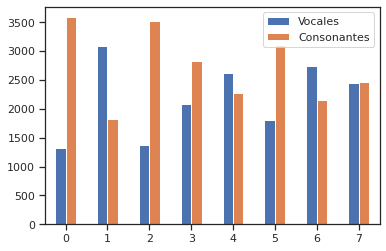

In [ ]:
groupedDF4 = createGroupedDF(8)


def resumeGroupedDF(groupedDF):
  dictToDF = {'Posicion':[], 'Vocales': [], 'Consonantes': []}
  for column in groupedDF.columns[1:]:
    infoPos = groupedDF4[column].value_counts()
    dictToDF['Posicion'].append(column)
    dictToDF['Vocales'].append(infoPos[1])
    dictToDF['Consonantes'].append(infoPos[0])

  return pd.DataFrame(dictToDF)

Lon8 = resumeGroupedDF(groupedDF4)

print(Lon4)
barplot = Lon8.plot.bar(rot=0)

     Posicion  Vocales  Consonantes
0  posicion 0     1193         2651
1  posicion 1     2322         1522
2  posicion 2      896         2948
3  posicion 3     1780         2064
4  posicion 4     1781         2063
5  posicion 5     1420         2424
6  posicion 6     2315         1529
7  posicion 7     1257         2587
8  posicion 8     2332         1512
9  posicion 9     1748         2096


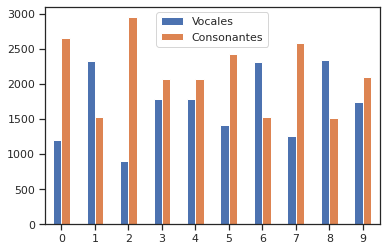

In [ ]:
groupedDF4 = createGroupedDF(10)


def resumeGroupedDF(groupedDF):
  dictToDF = {'Posicion':[], 'Vocales': [], 'Consonantes': []}
  for column in groupedDF.columns[1:]:
    infoPos = groupedDF4[column].value_counts()
    dictToDF['Posicion'].append(column)
    dictToDF['Vocales'].append(infoPos[1])
    dictToDF['Consonantes'].append(infoPos[0])

  return pd.DataFrame(dictToDF)

Lon10 = resumeGroupedDF(groupedDF4)

print(Lon10)
barplot = Lon10.plot.bar(rot=0)

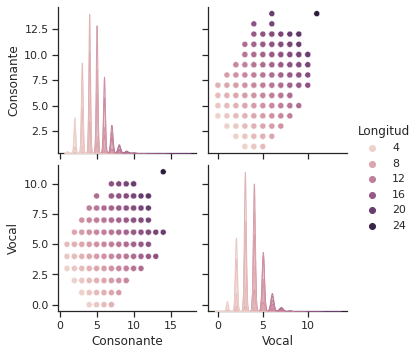

In [ ]:
sns.set_theme(style="ticks")

sns.pairplot(DF_wordInfo, hue="Longitud")